## Exploratory Data Analysis

In [48]:
pip install dash


Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 7.5 MB 10.2 MB/s eta 0:00:01
     |████████████████████████████████| 101 kB 12.1 MB/s ta 0:00:01
     |████████████████████████████████| 227 kB 15.9 MB/s eta 0:00:01
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [8]:
import sys
print(sys.executable)


/Library/Developer/CommandLineTools/usr/bin/python3


In [34]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import folium
from shapely import wkt

In [50]:
import pandas as pd
import dash
from dash import dcc, html
import plotly.express as px
import mysql.connector

## Create Map

In [32]:
# Load the geographic dataset as a GeoDataFrame
df_geo = pd.read_csv('/Users/shanelim/Desktop/Sem 3.1/Applications/PWC/pwc_data_case_study/cleaned_003_lomo_geolocation_dataset.csv')

# Load customer data
customer_data = pd.read_csv('/Users/shanelim/Desktop/Sem 3.1/Applications/PWC/pwc_data_case_study/cleaned_001_lomo_customers_dataset.csv')


In [38]:
print(df_geo.head())  # Ensure this is WKT format

   object_id    shape admin0_name_en admin0_name_th admin0_pcode  \
0          1  Polygon       Thailand      ประเทศไทย           TH   
1          2  Polygon       Thailand      ประเทศไทย           TH   
2          3  Polygon       Thailand      ประเทศไทย           TH   
3          4  Polygon       Thailand      ประเทศไทย           TH   
4          5  Polygon       Thailand      ประเทศไทย           TH   

  admin1_name_en admin1_name_th admin1_pcode  admin2_name_en admin2_name_th  \
0           Loei            เลย         TH42          Tha Li         ท่าลี่   
1        Pattani        ปัตตานี         TH94  Mueang Pattani   เมืองปัตตานี   
2          Surin       สุรินทร์         TH32         Buachet         บัวเชด   
3           Yala           ยะลา         TH95           Raman          รามัน   
4            Nan           น่าน         TH55        Wiang Sa        เวียงสา   

  admin2_pcode admin3_name_en admin3_name_th admin3_pcode  shape_length  \
0       TH4208           A Hi           อ

In [39]:
# Check the first few entries of the 'shape' column
print(customer_data.head())


                        customer_id                customer_unique_id  \
0  8535e7d171732dcdb3de48ff99040f6c  05c0c68fbdf283e56b37df9f2d20245c   
1  045ce65dc053765839733057c287dbcb  1f69219bc86e6918b4751692323de642   
2  c754052065714c0e304de22a0e5b7749  31b5e7b0290cf70ac603e77f85efb53f   
3  d707092bd024342cd484143f8fd20a55  3f6faa55fa7e82f1245fff7e2118663b   
4  6a899e55865de6549a58d2c6845e5604  3fb97204945ca0c01bcf3eee6031c5f1   

  customer_zip_code_prefix customer_city customer_state  
0                 TH100101   Phra Nakhon        Bangkok  
1                 TH100101   Phra Nakhon        Bangkok  
2                 TH100101   Phra Nakhon        Bangkok  
3                 TH100101   Phra Nakhon        Bangkok  
4                 TH100101   Phra Nakhon        Bangkok  


In [ ]:
import folium

# Center the map (use an approximate center for Thailand)
m = folium.Map(location=[13.736717, 100.523186], zoom_start=6)

# Example of adding polygons (assuming you have lat/lon bounds or can convert your shape data to GeoJSON)
# Replace with actual coordinates from your dataset
folium.Polygon(locations=[[13.736717, 100.523186], [13.85, 100.55], [13.70, 100.45]],
               color="blue", fill=True, fill_opacity=0.4).add_to(m)

# Show the map
m


In [ ]:


# Center the map (use an approximate center for Thailand)
m = folium.Map(location=[13.736717, 100.523186], zoom_start=6)

# Example of adding polygons (assuming you have lat/lon bounds or can convert your shape data to GeoJSON)
# Replace with actual coordinates from your dataset
folium.Polygon(locations=[[13.736717, 100.523186], [13.85, 100.55], [13.70, 100.45]],
               color="blue", fill=True, fill_opacity=0.4).add_to(m)

# Show the map
m


In [35]:

# Convert WKT (Well-Known Text) polygons to shapely objects
df_geo['geometry'] = df_geo['shape'].apply(wkt.loads)

_geo = pd.read_csv('/path/to/cleaned_003_lomo_geolocation_dataset.csv')

# Check if the 'shape' column contains WKT format polygons
print(df_geo['shape'].head())  # Ensure this is WKT format

# Convert WKT polygons to shapely objects
df_geo['geometry'] = df_geo['shape'].apply(wkt.loads)

# Create a base map centered on Thailand
m = folium.Map(location=[13.736717, 100.523186], zoom_start=6)

# Function to convert shapely polygons to coordinates that folium understands
def add_polygon_to_map(polygon, map_object, name):
    # Extract the exterior coordinates of the polygon
    exterior_coords = list(polygon.exterior.coords)
    
    # Add the polygon to the map
    folium.Polygon(locations=exterior_coords, popup=name, color='blue', fill=True, fill_opacity=0.4).add_to(map_object)

# Loop over each row in the DataFrame and add the polygon to the map
for idx, row in df_geo.iterrows():
    add_polygon_to_map(row['geometry'], m, row['admin1_name_en'])

# Display the map
m


GEOSException: ParseException: Expected word but encountered end of stream

In [41]:
import pandas as pd

# Load your dataset (adjust the file path)
df_geo = pd.read_csv('/Users/shanelim/Desktop/Sem 3.1/Applications/PWC/pwc_data_case_study/cleaned_003_lomo_geolocation_dataset.csv')

# Group by province (admin1_name_en) and calculate some statistics
grouped_province = df_geo.groupby('admin1_name_en').agg({
    'shape_length': 'sum',
    'shape_area': 'sum',
    'object_id': 'count'  # Count number of polygons per province
}).reset_index()

# Display the grouped data
print(grouped_province)


   admin1_name_en  shape_length  shape_area  object_id
0   Amnat Charoen     22.933735    0.275315         56
1       Ang Thong     12.757486    0.079211         73
2         Bangkok     19.576403    0.131337        169
3       Bueng Kan     28.545121    0.340783         53
4        Buri Ram     68.418511    0.844544        189
..            ...           ...         ...        ...
72     Udon Thani     71.806473    0.940134        156
73    Uthai Thani     30.147826    0.558743         70
74      Uttaradit     34.940441    0.674673         67
75           Yala     21.756892    0.365446         58
76       Yasothon     28.139036    0.345760         79

[77 rows x 4 columns]


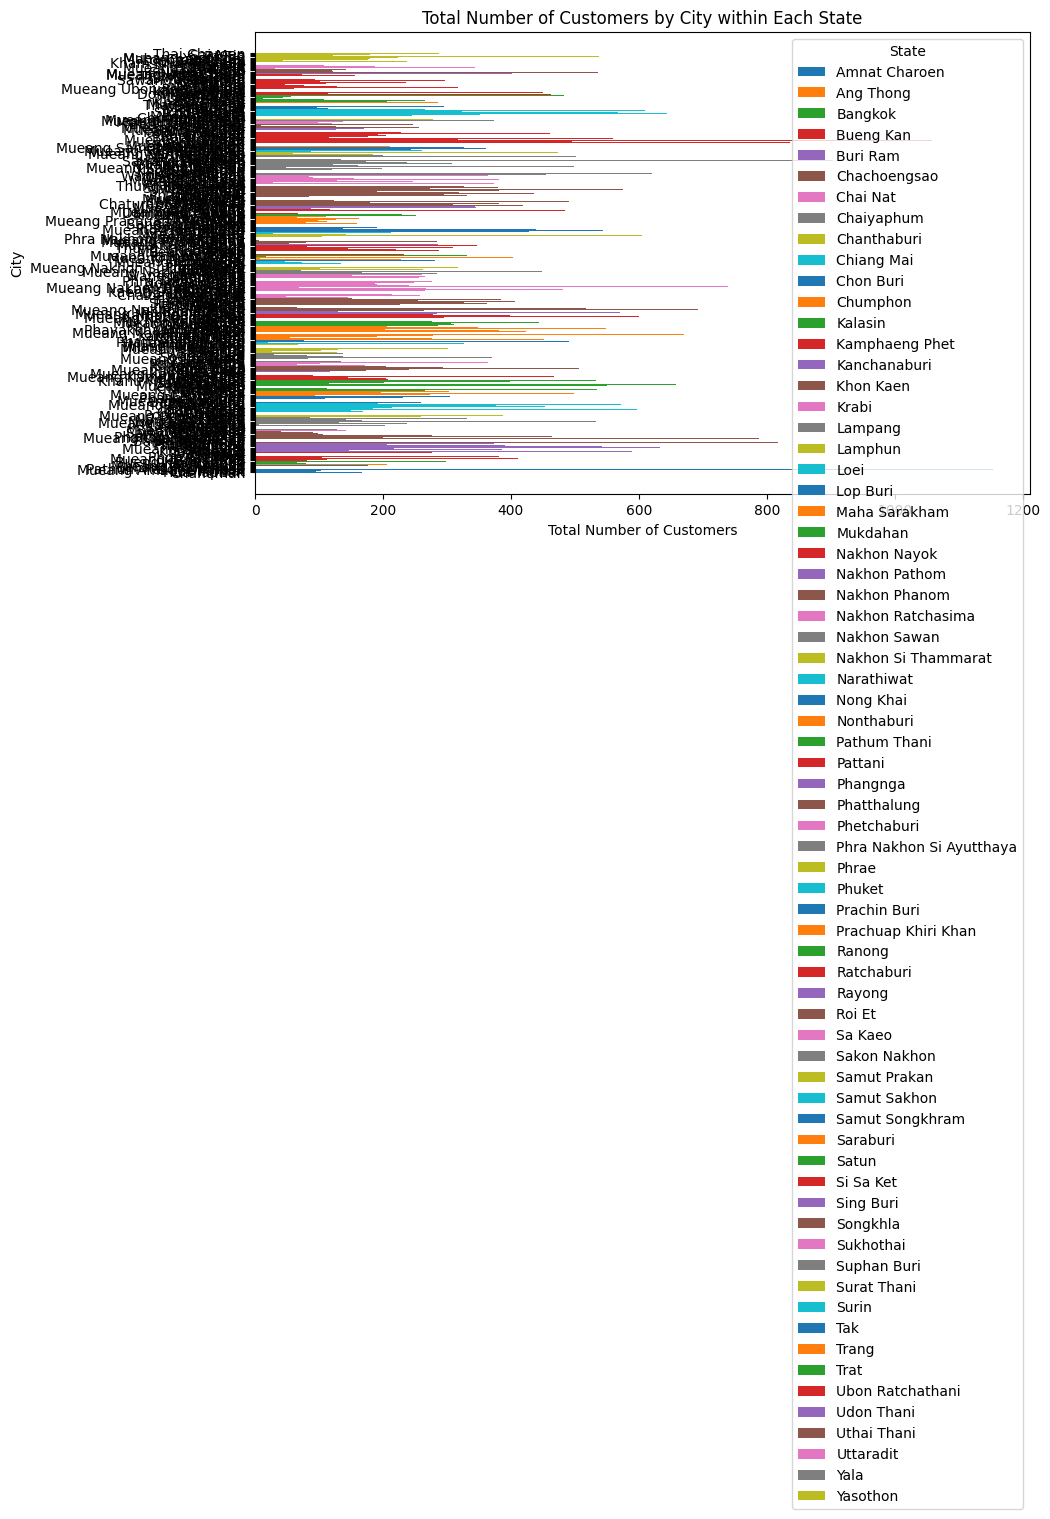

In [46]:
import matplotlib.pyplot as plt
import pandas as pd

# Group by 'customer_state' and then 'customer_city'
grouped_state_city = customer_data.groupby(['customer_state', 'customer_city']).size().reset_index(name='customer_count')

# Plot the total number of customers by city within each state
plt.figure(figsize=(10, 6))

# Plot the grouped data
for state in grouped_state_city['customer_state'].unique():
    state_data = grouped_state_city[grouped_state_city['customer_state'] == state]
    plt.barh(state_data['customer_city'], state_data['customer_count'], label=state)

plt.xlabel('Total Number of Customers')
plt.ylabel('City')
plt.title('Total Number of Customers by City within Each State')
plt.legend(title='State')
plt.show()




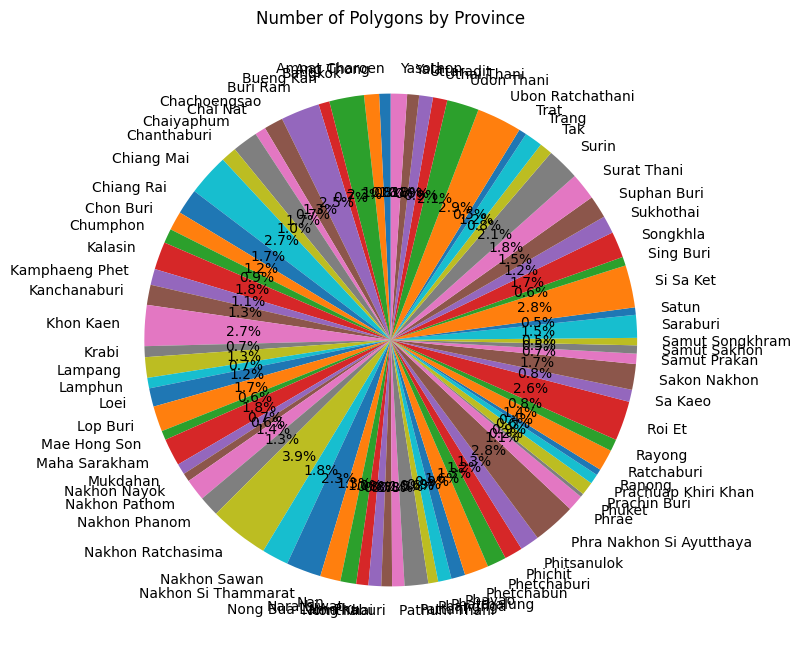

In [43]:
# Plot the number of polygons per province using a pie chart
plt.figure(figsize=(8, 8))
plt.pie(grouped_province['object_id'], labels=grouped_province['admin1_name_en'], autopct='%1.1f%%', startangle=90)
plt.title('Number of Polygons by Province')
plt.show()


In [51]:

# Define your query
query = """
SELECT product_category_name_english, seller_id, order_purchase_timestamp, order_delivered_carrier_date, price
FROM all_sales_w_delivery_status;
"""

# Execute the query and load the data into a pandas DataFrame
df = pd.read_sql(query, connection)

# Ensure the date columns are in datetime format
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])
df['order_delivered_carrier_date'] = pd.to_datetime(df['order_delivered_carrier_date'])

# Calculate delivery time in days
df['delivery_time_days'] = (df['order_delivered_carrier_date'] - df['order_purchase_timestamp']).dt.days

# Group by seller to get the average delivery time and total revenue
grouped_df = df.groupby('seller_id').agg({'delivery_time_days': 'mean', 'price': 'sum'}).reset_index()

# Close the database connection
connection.close()

# Create the Dash app
app = dash.Dash(__name__)

app.layout = html.Div([
    html.H1("Seller Delivery Performance Dashboard"),
    
    dcc.Graph(
        id='delivery-time-bar',
        figure=px.bar(grouped_df, x='seller_id', y='delivery_time_days',
                      title='Average Delivery Time by Seller')
    ),
    
    dcc.Graph(
        id='revenue-bar',
        figure=px.bar(grouped_df, x='seller_id', y='price',
                      title='Total Revenue by Seller')
    )
])

if __name__ == '__main__':
    app.run_server(debug=True)


NameError: name 'connection' is not defined